<a href="https://colab.research.google.com/github/faznafathima/__PROJECTS__/blob/main/ARIMA_and_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TIME SERIES FORECASTING USING ARIMA AND SARIMA**


---



In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.2 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 88 kB 5.9 MB/s 
     |████████████████████████████████| 1.7 MB 56.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 636 kB 49.7 MB/s 
     |████████████████████████████████| 17.0 MB 40.8 MB/s 
     |████████████████████████████████| 4.8 MB 44.3 MB/s 
     |████████████████████████████████| 6.8 MB 39.1 MB/s 
     |████████████████████████████████| 25.9 MB 79.6 MB/s 
     |████████████████████████████████| 167 kB 48.7 MB/s 
     |████████████████████████████████| 315 kB 56.7 MB/s 
     |████████████████████████████████| 141 kB 58.2 MB/s 
     |████████████████████████████████|

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
inf_data1 = pd.read_csv(r'/content/drive/MyDrive/Mini_Project2_Data.csv')
inf_data1.head()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,200940,10-10-2009,Bay Area,Influenza_A,36,220,16.36
1,2009-2010,200940,10-10-2009,Bay Area,Influenza_B,0,220,0.00
2,2009-2010,200940,10-10-2009,Bay Area,Total_Influenza,36,220,16.36
3,2009-2010,200940,10-10-2009,Bay Area,RSV,0,190,0.00
4,2009-2010,200940,10-10-2009,California,Influenza_A,1077,3324,32.40


In [ ]:
print(inf_data1.shape)

(50011, 8)


In [ ]:
inf_data1.isnull().sum()

season                  0
date_code               0
weekending              0
region                  0
respiratory_virus       0
number_positive         0
specimens_tested        0
percent_positive     7597
dtype: int64

In [ ]:
inf_data1 = inf_data1.dropna()
inf_data1.isnull().sum()

season               0
date_code            0
weekending           0
region               0
respiratory_virus    0
number_positive      0
specimens_tested     0
percent_positive     0
dtype: int64

In [ ]:
inf_data1['region'].value_counts()

California              7137
Central                 7121
Upper Southern          6999
Bay Area                5817
Lower Southern          5744
Northern                5140
Upper/Lower Southern    4404
Northern/Bay Area         52
Name: region, dtype: int64

In [ ]:
inf_data1['season'].value_counts()

2018-2019    6045
2019-2020    6024
2017-2018    5931
2016-2017    5754
2015-2016    5608
2014-2015    4551
2013-2014    3460
2010-2011    1339
2011-2012    1261
2009-2010    1224
2012-2013    1217
Name: season, dtype: int64

In [ ]:
inf_data1['respiratory_virus'].value_counts()

Influenza_A                  3668
Influenza_B                  3668
Total_Influenza              3668
RSV                          3641
Enterovirus_Rhinovirus       2322
Total_Parainfluenza          2321
Parainfluenza_UnknownType    2321
Parainfluenza_4              2321
Parainfluenza_3              2321
Parainfluenza_2              2321
Parainfluenza_1              2321
Adenovirus                   2320
HMPV                         2313
Coronavirus_HKU1             1148
Coronavirus_NL63             1148
Coronavirus_OC43             1148
Coronavirus_229E             1148
Coronavirus_UnknownType      1148
Total_Coronavirus            1148
Name: respiratory_virus, dtype: int64

In [ ]:
inf_data1 = inf_data1.drop(['date_code'], axis = 1)

In [ ]:
pd.set_option('mode.chained_assignment', None)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df1 = inf_data1.loc[inf_data1['respiratory_virus'] == 'Influenza_A'].copy()

In [ ]:
df2 = inf_data1.loc[inf_data1["respiratory_virus"] == "RSV"].copy()

In [ ]:
df3 = inf_data1.loc[inf_data1["respiratory_virus"] == "Adenovirus"].copy()

In [ ]:
df4 = inf_data1.loc[inf_data1["respiratory_virus"] == "HMPV"].copy()

In [ ]:
inf_df1 = pd.concat([df2, df1], ignore_index = True, axis = 0)
inf_df2 = pd.concat([inf_df1, df3], ignore_index = True, axis = 0)
inf_df3 = pd.concat([inf_df2, df4], ignore_index = True, axis = 0)
inf_df3.head()

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,10-10-2009,Bay Area,RSV,0,190,0.00
1,2009-2010,10-10-2009,California,RSV,2,2218,0.09
2,2009-2010,10-10-2009,Central,RSV,0,329,0.00
3,2009-2010,10-10-2009,Lower Southern,RSV,0,35,0.00
4,2009-2010,10-10-2009,Northern/Bay Area,RSV,2,1510,0.13


In [ ]:
inf_df3['respiratory_virus'].value_counts()

Influenza_A    3668
RSV            3641
Adenovirus     2320
HMPV           2313
Name: respiratory_virus, dtype: int64

# **BAY AREA**

In [ ]:
df_reg1 = inf_df3.loc[inf_df3['region'] == 'Bay Area'].copy()
df_reg1.head()

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,10-10-2009,Bay Area,RSV,0,190,0.00
7,2009-2010,17-10-2009,Bay Area,RSV,1,249,0.40
13,2009-2010,24-10-2009,Bay Area,RSV,0,282,0.00
19,2009-2010,31-10-2009,Bay Area,RSV,2,273,0.73
25,2009-2010,07-11-2009,Bay Area,RSV,0,286,0.00


# **INFLUENZA A**

In [ ]:
df_reg1_rv1 = df_reg1.loc[df_reg1['respiratory_virus'] == 'Influenza_A']
df_reg1_rv1

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
3641,2009-2010,10-10-2009,Bay Area,Influenza_A,36,220,16.36
3648,2009-2010,17-10-2009,Bay Area,Influenza_A,47,283,16.61
3654,2009-2010,24-10-2009,Bay Area,Influenza_A,53,330,16.06
3660,2009-2010,31-10-2009,Bay Area,Influenza_A,51,334,15.27
3666,2009-2010,07-11-2009,Bay Area,Influenza_A,70,328,21.34
...,...,...,...,...,...,...,...
7279,2019-2020,29-08-2020,Bay Area,Influenza_A,0,117,0.00
7285,2019-2020,05-09-2020,Bay Area,Influenza_A,0,98,0.00
7291,2019-2020,12-09-2020,Bay Area,Influenza_A,0,114,0.00
7297,2019-2020,19-09-2020,Bay Area,Influenza_A,1,145,0.69


In [ ]:
df_r11 = df_reg1_rv1[['weekending', 'percent_positive']]
df_r11['InfA_PP'] = df_r11['percent_positive']
df_r11 = df_r11.drop(['percent_positive'], axis = 1)
df_r11.head()

,weekending,InfA_PP
3641,10-10-2009,16.36
3648,17-10-2009,16.61
3654,24-10-2009,16.06
3660,31-10-2009,15.27
3666,07-11-2009,21.34


In [ ]:
df_r11.tail()

,weekending,InfA_PP
7279,29-08-2020,0.00
7285,05-09-2020,0.00
7291,12-09-2020,0.00
7297,19-09-2020,0.69
7303,26-09-2020,0.00


In [ ]:
df_r11.shape

(573, 2)

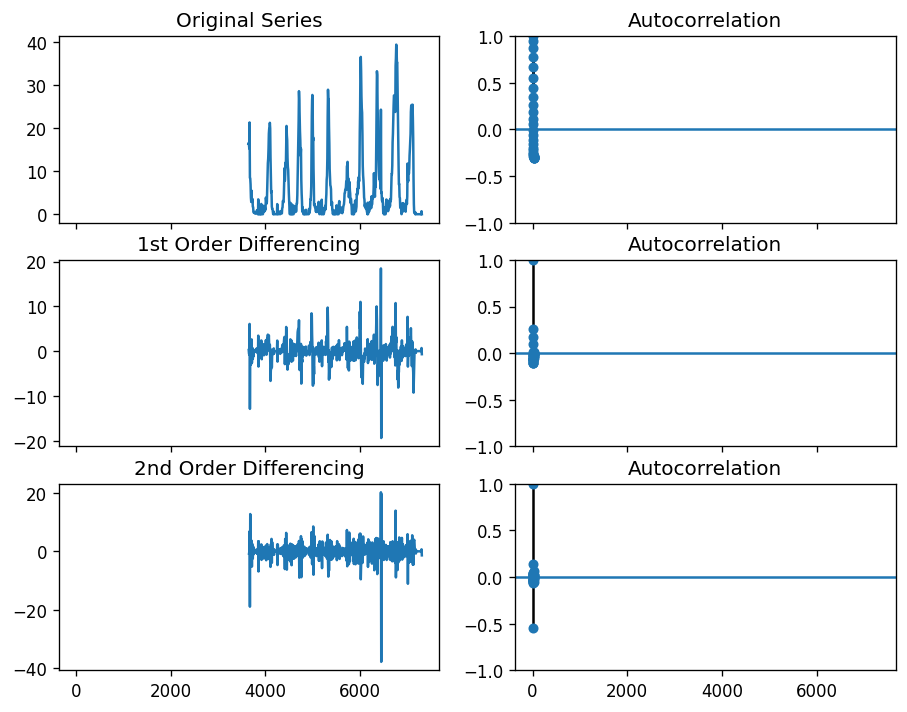

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_r11.InfA_PP); axes[0, 0].set_title('Original Series')
plot_acf(df_r11.InfA_PP, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_r11.InfA_PP.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_r11.InfA_PP.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_r11.InfA_PP.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_r11.InfA_PP.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


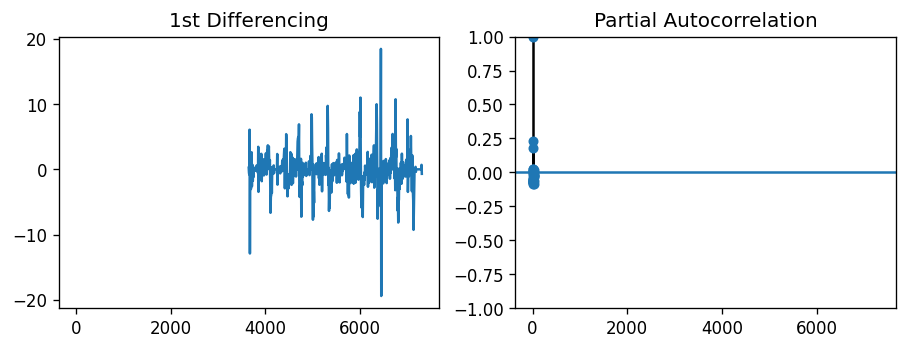

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_r11.InfA_PP.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_r11.InfA_PP.diff().dropna(), ax=axes[1])

plt.show()

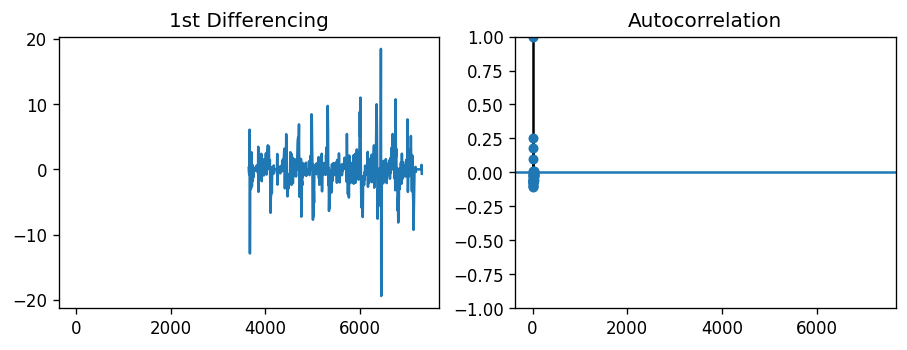

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_r11.InfA_PP.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_r11.InfA_PP.diff().dropna(), ax=axes[1])

plt.show()

**Ploting data**

In [ ]:
#string to date format
df_r11['weekending'] = pd.to_datetime(df_r11['weekending'],infer_datetime_format=True)
df_r11 = df_r11.set_index(['weekending'])
df_r11.head(5)

,InfA_PP
weekending,
2009-10-10,16.36
2009-10-17,16.61
2009-10-24,16.06
2009-10-31,15.27
2009-07-11,21.34


In [ ]:
df_r11.tail()

,InfA_PP
weekending,
2020-08-29,0.00
2020-05-09,0.00
2020-12-09,0.00
2020-09-19,0.69
2020-09-26,0.00


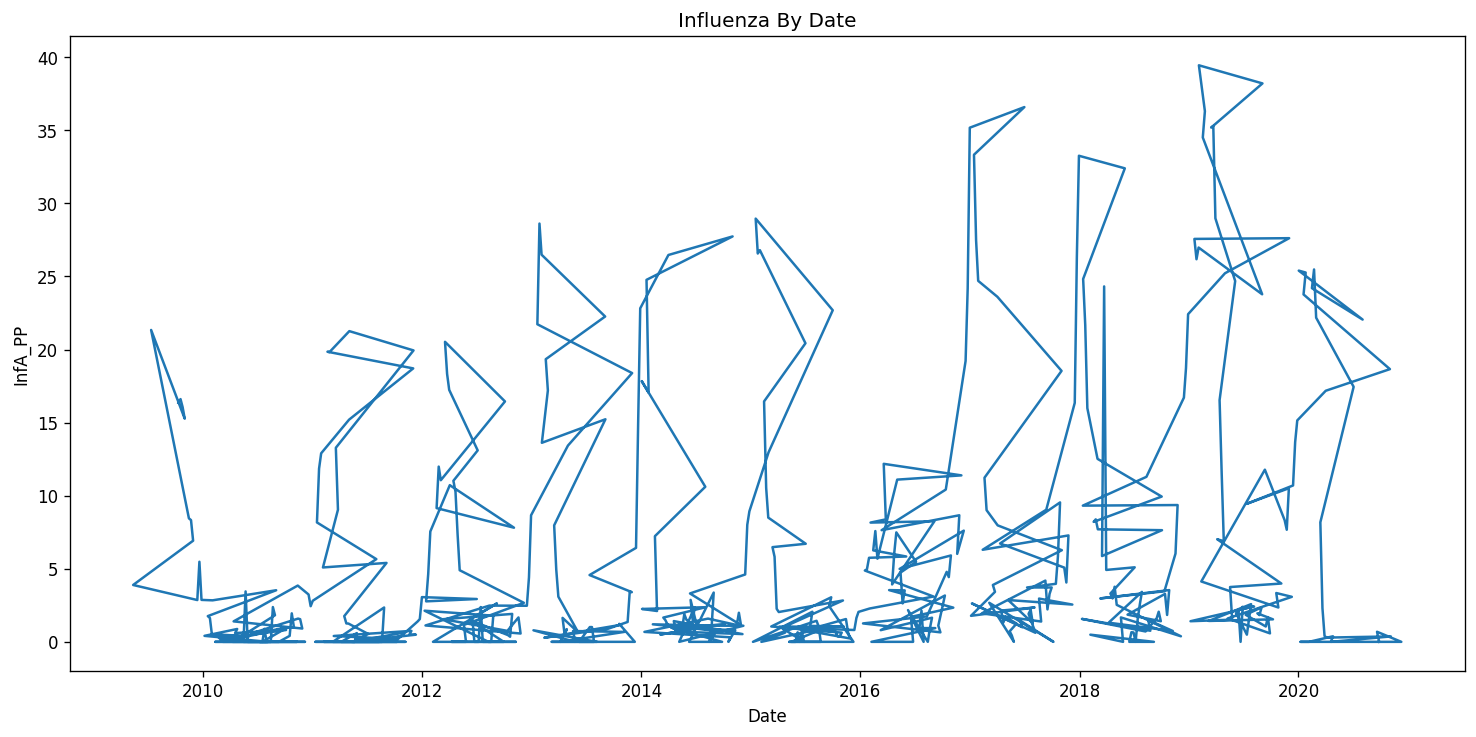

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Influenza By Date")
plt.xlabel('Date')
plt.ylabel('InfA_PP')
plt.plot(df_r11)
plt.show()

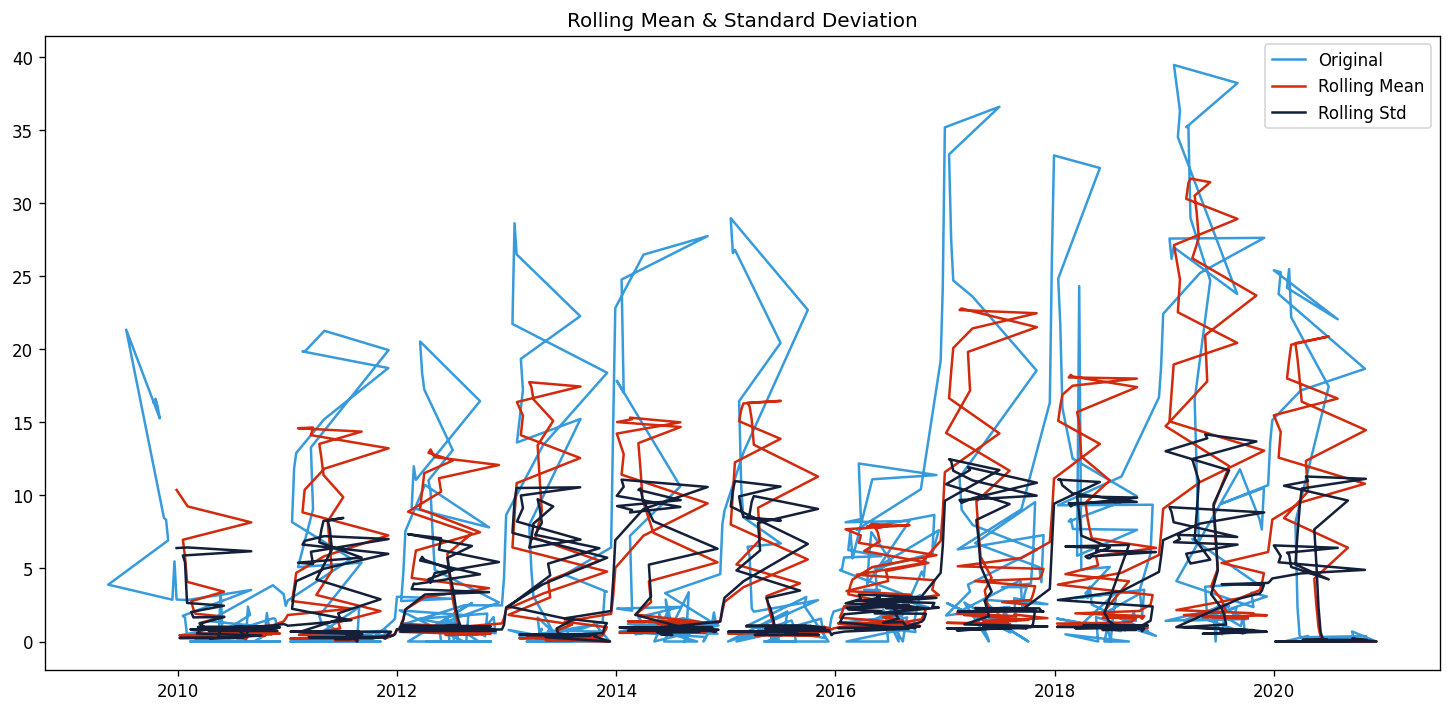

In [ ]:
#Determine rolling statistics
df_r11["rolling_avg"] = df_r11["InfA_PP"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
df_r11["rolling_std"] = df_r11["InfA_PP"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df_r11["InfA_PP"], color='#379BDB', label='Original')
plt.plot(df_r11["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(df_r11["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

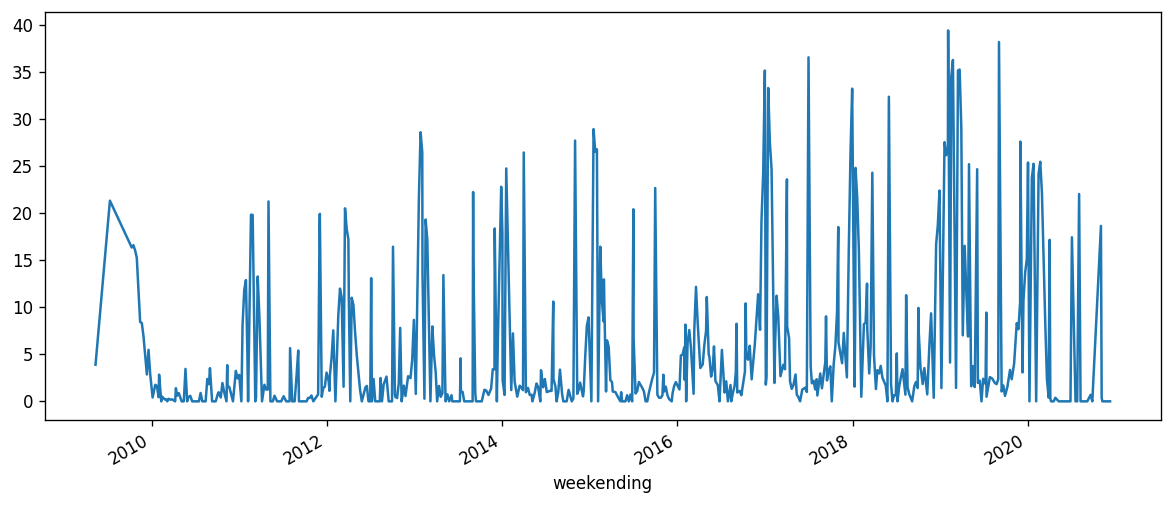

In [ ]:
df_r11['InfA_PP'].plot(figsize=(12,5))

**Check For Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     adf = dftest[0]
     pvalue = dftest[1]
     critical_value = dftest[4]['5%']
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
     if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
     else:
        print('The series is NOT stationary')
adf_test(df_r11['InfA_PP'])

1. ADF :  -6.666696416051699
2. P-Value :  4.698088545572578e-09
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 569
5. Critical Values :
	 1% :  -3.4418948967017475
	 5% :  -2.8666329082535222
	 10% :  -2.569482366838501
The series is stationary


**ACF and PCF plots**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


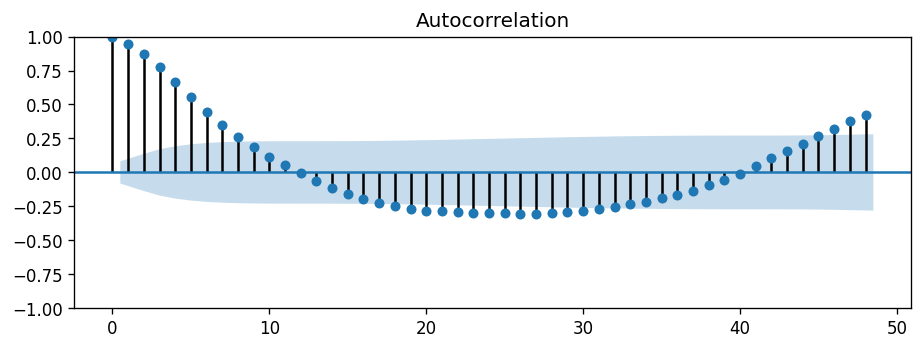

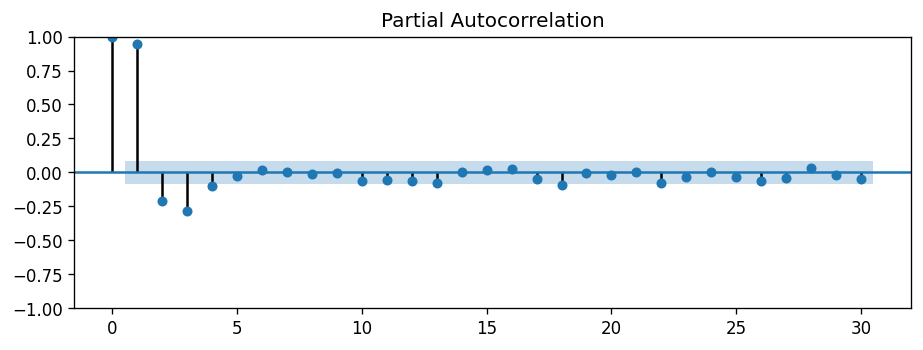

In [ ]:
plot_acf(df_r11['InfA_PP'], lags=48);
plot_pacf(df_r11['InfA_PP'], lags=30);

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Splitting Dataset**

In [ ]:
print(df_r11.shape)
training=df_r11.iloc[:-30]
testing=df_r11.iloc[-30:]
print(training.shape,testing.shape)

(573, 3)
(543, 3) (30, 3)


# **ARIMA**

**Creating and fitting ARIMA Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(training['InfA_PP'],order=(1,0,5))

# fit the model
res=model.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ValueWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ValueWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has bee

                               SARIMAX Results                                
Dep. Variable:                InfA_PP   No. Observations:                  543
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -1265.757
Date:                Sat, 19 Nov 2022   AIC                           2547.514
Time:                        10:55:07   BIC                           2581.891
Sample:                             0   HQIC                          2560.956
                                - 543                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1625      2.217      2.780      0.005       1.817      10.508
ar.L1          0.8553      0.034     25.295      0.000       0.789       0.922
ma.L1          0.1828      0.035      5.203      0.0

In [ ]:

predictions = res.predict()


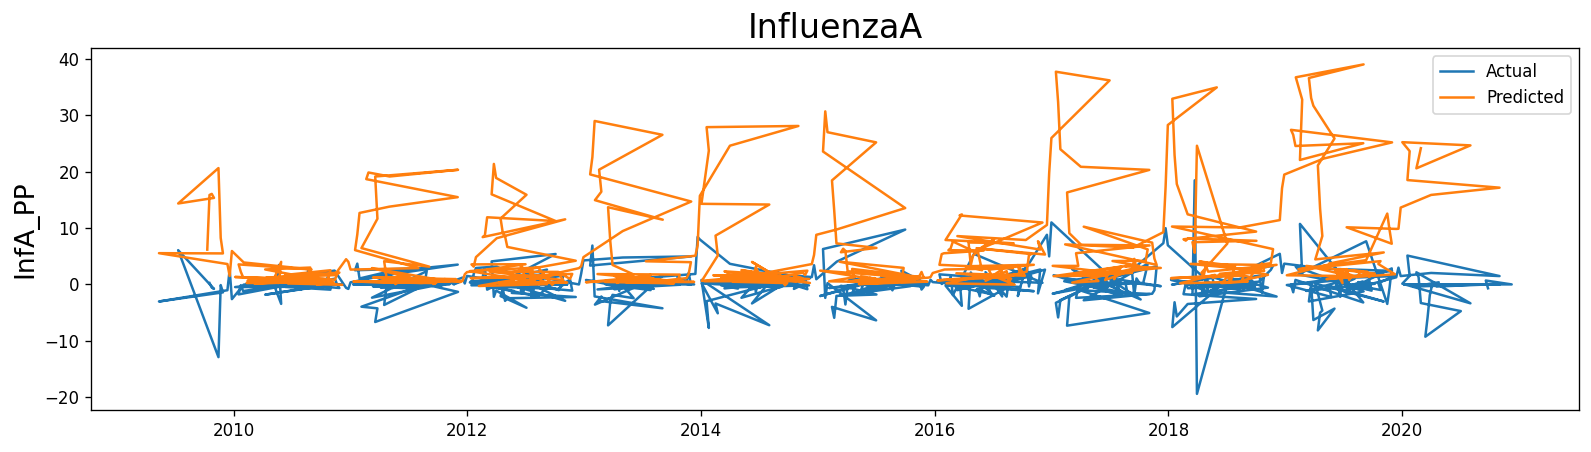

In [ ]:
# Visualization

plt.figure(figsize=(16,4))
plt.plot(df_r11['InfA_PP'].diff(), label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('InfluenzaA', fontsize=20)
plt.ylabel('InfA_PP', fontsize=16)
plt.legend()

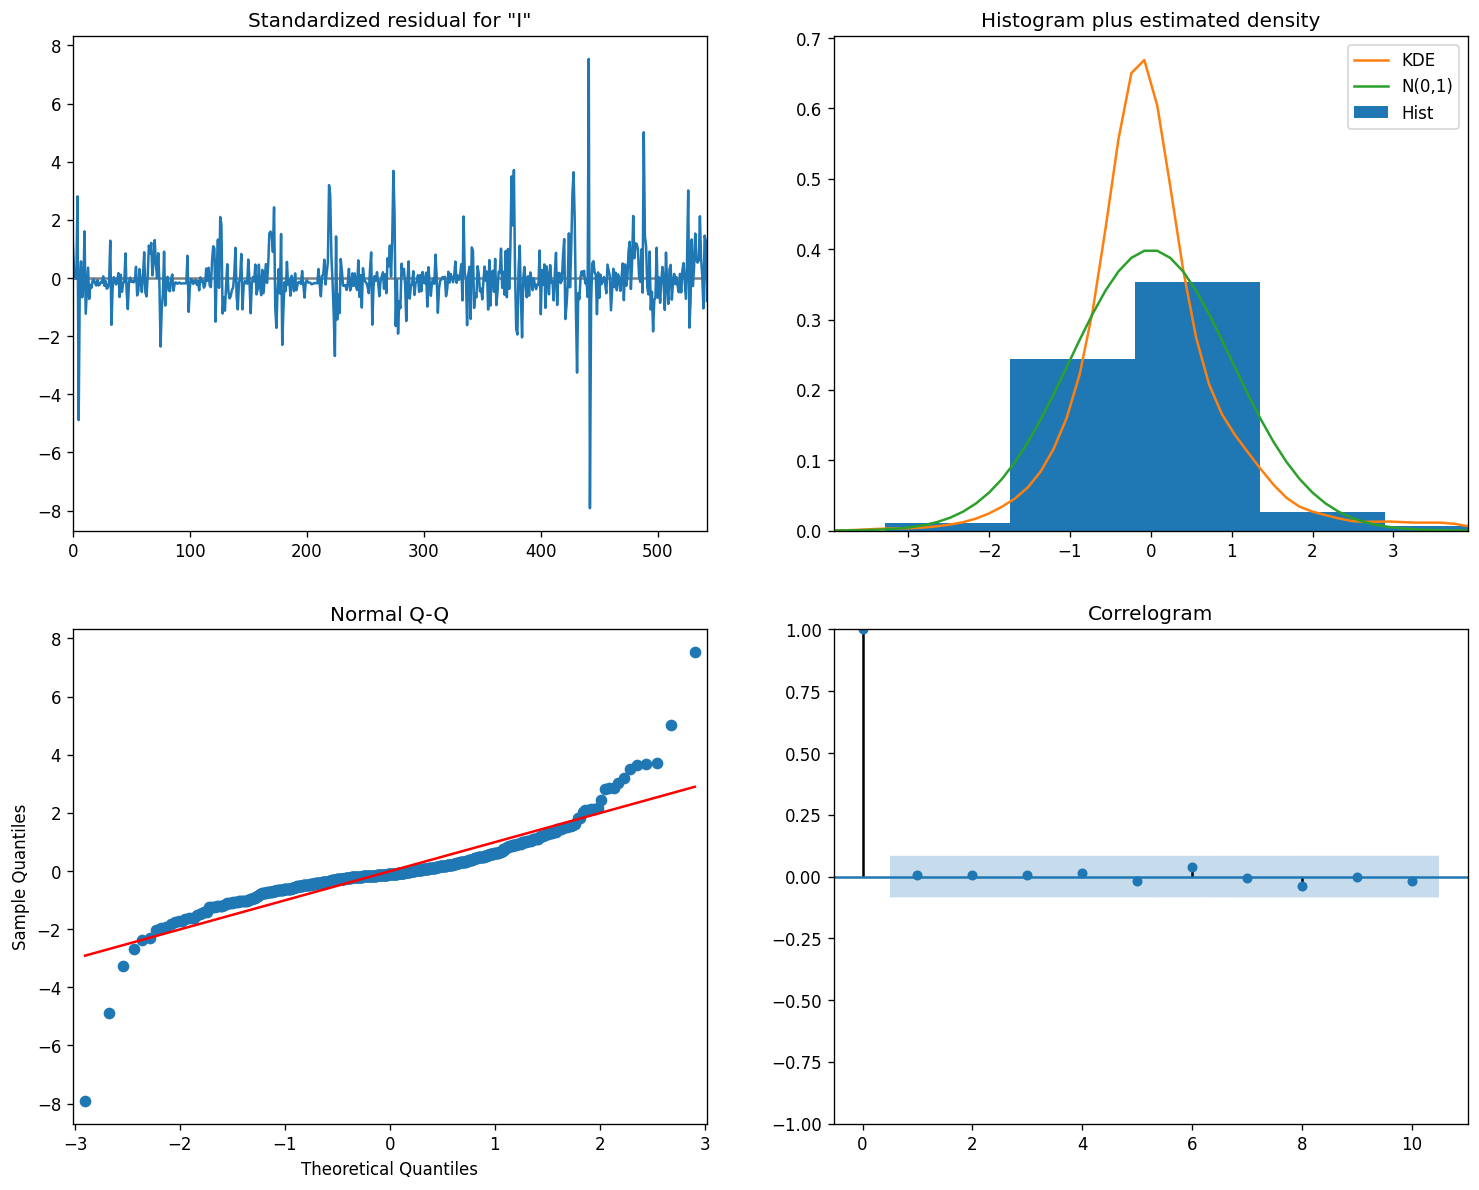

In [ ]:
#diagnostic plot
res.plot_diagnostics(figsize=(15,12))
plt.show()

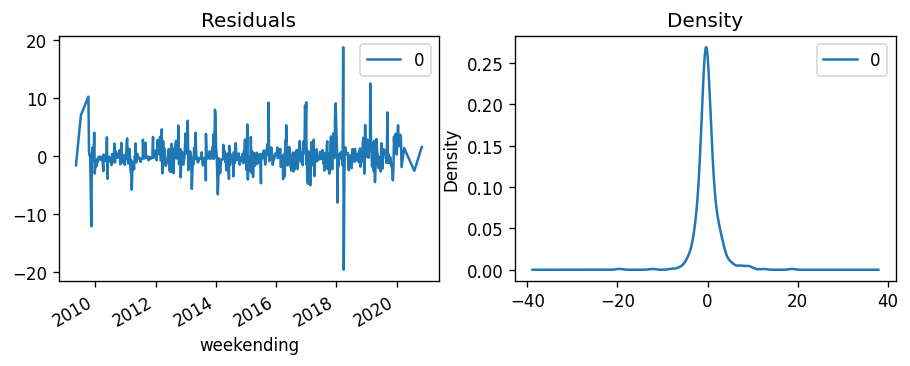

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(res.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

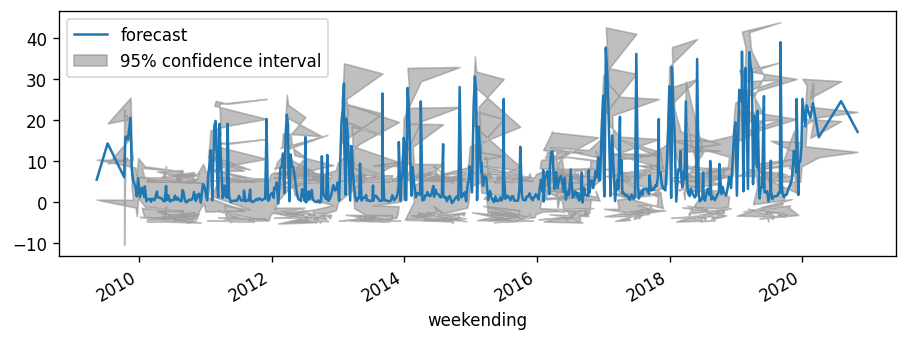

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
# Actual vs Fitted
plot_predict(res, dynamic=False)
plt.show()

**Accuracy Metric**

In [ ]:
testing['InfA_PP'].mean()

1.0023333333333333

In [ ]:
df_r11.tail()

,InfA_PP,rolling_avg,rolling_std
weekending,,,
2020-08-29,0.00,0.0000,5.927544e-07
2020-05-09,0.00,0.0000,5.927544e-07
2020-12-09,0.00,0.0000,5.927544e-07
2020-09-19,0.69,0.0575,1.991858e-01
2020-09-26,0.00,0.0575,1.991858e-01


**Forecasting**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  after removing the cwd from sys.path.


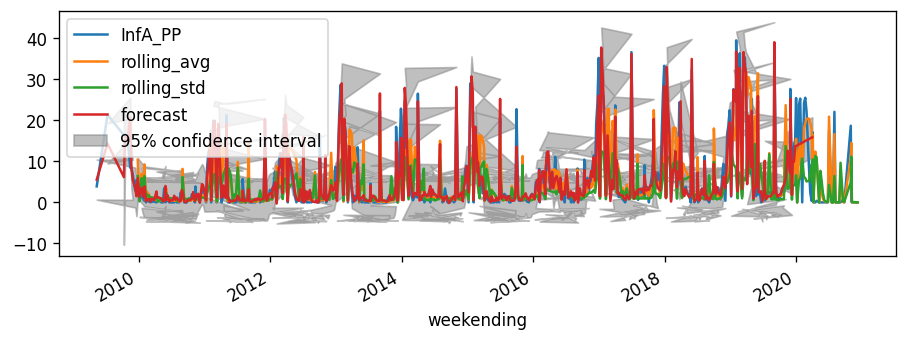

In [ ]:
# Plot forecasted series and original data
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = df_r11.loc['2009':].plot(ax=ax)
plot_predict(res, '2009', '2020', ax=ax)
plt.show()
#res.plot_predict(start='2009-10-10',end='2020-09-26')
#plt.show

In [ ]:
#To get the confidence intervals and standard error,

# Forecasting
forecasts,SE,Interval = res.forecast(steps=3, alpha=0.05)

print(forecasts)
print(SE)
print(Interval)

print()

20.96453501732887
19.0092663666741
17.614949645470574



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  if isinstance(end, slice):


**For Future Dates**

In [ ]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=res.predict(start=len(df_r11),end=len(df_r11)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    6.304282
2018-12-31    6.283768
2019-01-01    6.266221
2019-01-02    6.251213
2019-01-03    6.238376
2019-01-04    6.227395
2019-01-05    6.218004
2019-01-06    6.209970
2019-01-07    6.203099
2019-01-08    6.197222
2019-01-09    6.192195
2019-01-10    6.187895
2019-01-11    6.184217
2019-01-12    6.181072
2019-01-13    6.178381
2019-01-14    6.176079
2019-01-15    6.174111
2019-01-16    6.172427
2019-01-17    6.170987
2019-01-18    6.169755
2019-01-19    6.168701
2019-01-20    6.167800
2019-01-21    6.167029
2019-01-22    6.166370
2019-01-23    6.165806
2019-01-24    6.165323
2019-01-25    6.164911
2019-01-26    6.164558
2019-01-27    6.164256
2019-01-28    6.163998
2019-01-29    6.163777
Freq: D, Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  if isinstance(end, slice):


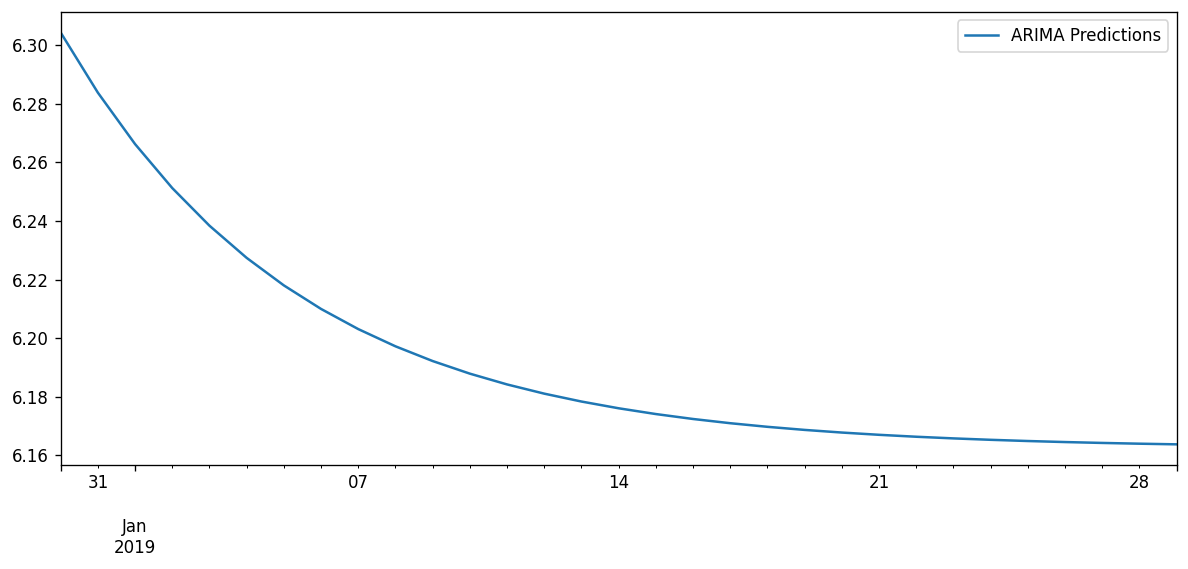

In [ ]:
pred.plot(figsize=(12,5),legend=True)



---



---



# **SARIMA**

In [ ]:
# creating and fitting the model

from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(training['InfA_PP'],order=(1, 1, 2),seasonal_order=(1,1,1,12))

results = sarima.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ValueWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ValueWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              InfA_PP   No. Observations:                  543
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -1275.956
Date:                              Sat, 19 Nov 2022   AIC                           2563.913
Time:                                      11:13:52   BIC                           2589.550
Sample:                                           0   HQIC                          2573.948
                                              - 543                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4508      0.106      4.242      0.000       0.242       0.659
ma.L1         -0.3447      0.103     -3.335      0.001      -0.547      -0.142
ma.L2          0.2113      0.044      4.792      0.000       0.125       0.298
ar.S.L12       0.0665      0.055      1.215      0.225      -0.041       0.174
ma.S.L12      -0.9985      0.702     -1.423      0.155      -2.374       0.377
sigma2         6.6518      4.539      1.465      0.143      -2.245      15.549
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4278.77
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.70   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
sarima = SARIMAX(df_r11['InfA_PP'],
                order=(1,1,1),
                seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ValueWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ValueWarning,


**Hyperparameter Tuning**

In [ ]:
import itertools

In [ ]:
# parameters for sarima
p = range(0,2)
d = range(0,2)
q = range(0,2)

pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq] # All combinations

In [ ]:
# Determing p,d,q combinations with AIC scores.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(training,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

        except:
            continue
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2563.9127406997795


**Prediction**

In [ ]:
#one step forecast
yhat=results.forecast()
yhat=results.predict(start=len(df_r11),end=len(df_r11))
print(yhat)

573    23.401535
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  if isinstance(end, slice):
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  if isinstance(end, slice):


In [ ]:
#predict the test data to compare with the real test data later
start =len(training)
end = len(training) + len(testing)-1

predictions = results.predict(start,end=end, dynamic= False, typ='levels').rename('Predictions')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  if isinstance(end, slice):


**Visualization**

In [ ]:
df_r11.dtypes

InfA_PP        float64
rolling_avg    float64
rolling_std    float64
dtype: object

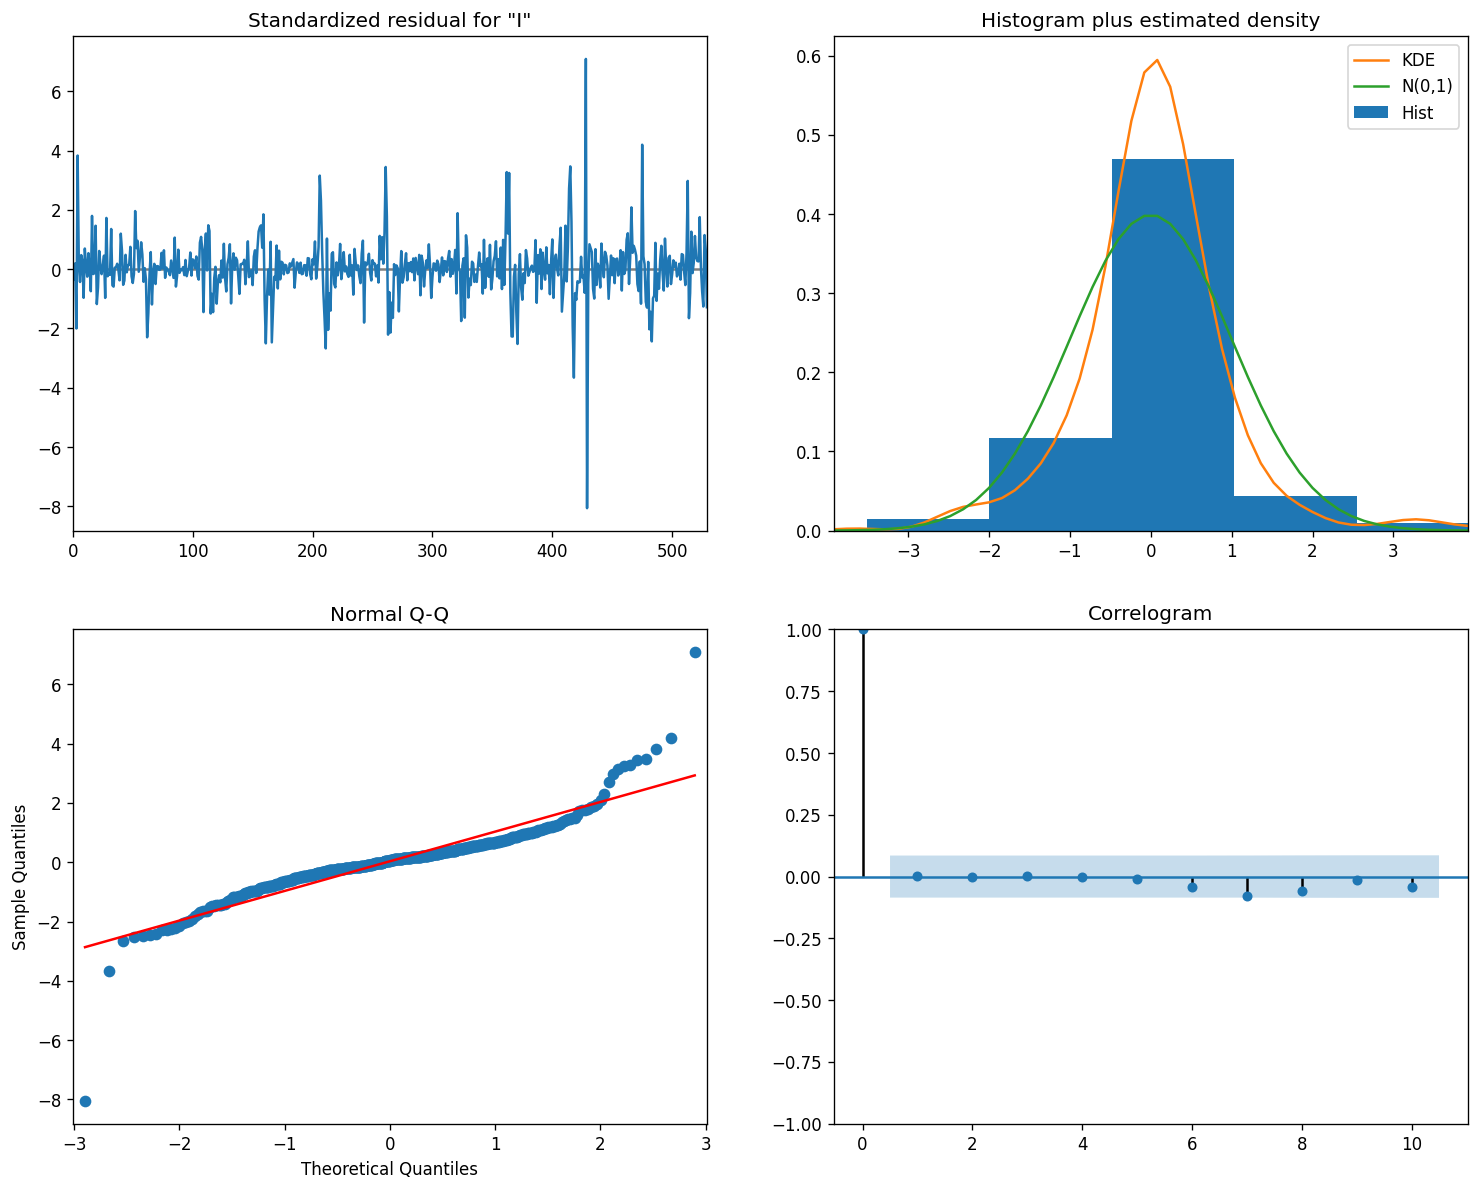

In [ ]:
# diagnostic plot
results.plot_diagnostics(figsize=(15,12))
plt.show()

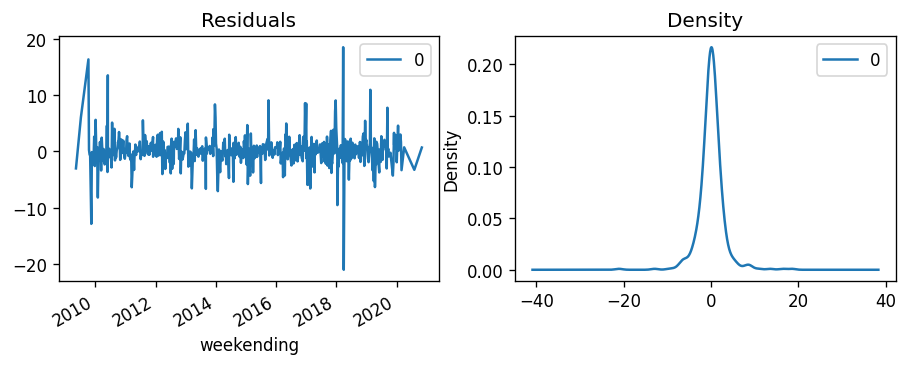

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

**Forecasting**

In [ ]:
#Forecast 50 steps ahead
forecast_values = results.get_forecast(steps=50)

#Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  if isinstance(end, slice):


In [ ]:
# Forecast 12 steps ahead
forecast_values = results.get_forecast(steps=12)

# Prediction summary
forecast_values.summary_frame()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  if isinstance(end, slice):


InfA_PP,mean,mean_se,mean_ci_lower,mean_ci_upper
543,22.655867,2.605567,17.549051,27.762684
544,22.224988,3.885111,14.610311,29.839665
545,21.943317,5.267463,11.619280,32.267354
546,22.245243,6.531137,9.444449,35.046037
547,22.370858,7.657906,7.361638,37.380078
548,22.848532,8.667734,5.860085,39.836979
549,23.320900,9.583468,4.537648,42.104152
550,23.494969,10.423963,3.064377,43.925561
551,22.924662,11.203631,0.965949,44.883375
552,22.872948,11.933305,-0.515900,46.261796


In [ ]:
# Prediction

forecast_values.predicted_mean

543    22.655867
544    22.224988
545    21.943317
546    22.245243
547    22.370858
548    22.848532
549    23.320900
550    23.494969
551    22.924662
552    22.872948
553    23.007521
554    22.310489
Name: predicted_mean, dtype: float64

In [ ]:
# Confidence interval
forecast_values.conf_int()

,lower InfA_PP,upper InfA_PP
543,17.549051,27.762684
544,14.610311,29.839665
545,11.619280,32.267354
546,9.444449,35.046037
547,7.361638,37.380078
548,5.860085,39.836979
549,4.537648,42.104152
550,3.064377,43.925561
551,0.965949,44.883375
552,-0.515900,46.261796


In [ ]:
# Forecasting
forecasts,SE,Interval = results.forecast(steps=3, alpha=0.05)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  if isinstance(end, slice):


In [ ]:
#To get the confidence intervals and standard error,

# Forecasting
forecasts,SE,Interval = results.forecast(steps=3, alpha=0.05)

print(forecasts)
print(SE)
print(Interval)

print()

22.655867480581698
22.224988239277046
21.94331661366921



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  if isinstance(end, slice):


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  if isinstance(end, slice):


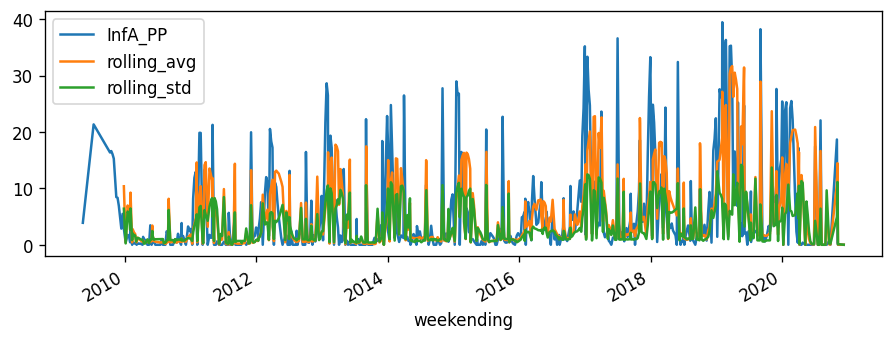

In [ ]:
# Plot forecasted series and original data
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = df_r11.loc['2009':].plot(ax=ax)
predictions = results.predict(start=training.shape[0],end=(training.shape[0]+testing.shape[0]-1), dynamic=False)
#plot_predict(results, '2009-10-10', '2020-09-26', ax=ax)
plt.show()
#res.plot_predict(start='2009-10-10',end='2020-09-26')
#plt.show

**Future Dates**

In [ ]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=results.predict(start=len(df_r11),end=len(df_r11)+30,typ='levels').rename('SARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    23.401535
2018-12-31    23.583957
2019-01-01    23.213141
2019-01-02    23.006345
2019-01-03    23.060164
2019-01-04    22.547949
2019-01-05    22.714639
2019-01-06    22.667363
2019-01-07    22.542321
2019-01-08    22.848338
2019-01-09    22.934819
2019-01-10    23.108445
2019-01-11    23.519277
2019-01-12    23.701734
2019-01-13    23.331745
2019-01-14    23.124306
2019-01-15    23.177790
2019-01-16    22.666341
2019-01-17    22.832947
2019-01-18    22.785777
2019-01-19    22.660777
2019-01-20    22.966795
2019-01-21    23.053266
2019-01-22    23.226808
2019-01-23    23.637624
2019-01-24    23.820083
2019-01-25    23.450149
2019-01-26    23.242667
2019-01-27    23.296129
2019-01-28    22.784730
2019-01-29    22.951331
Freq: D, Name: SARIMA Predictions, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  if isinstance(end, slice):


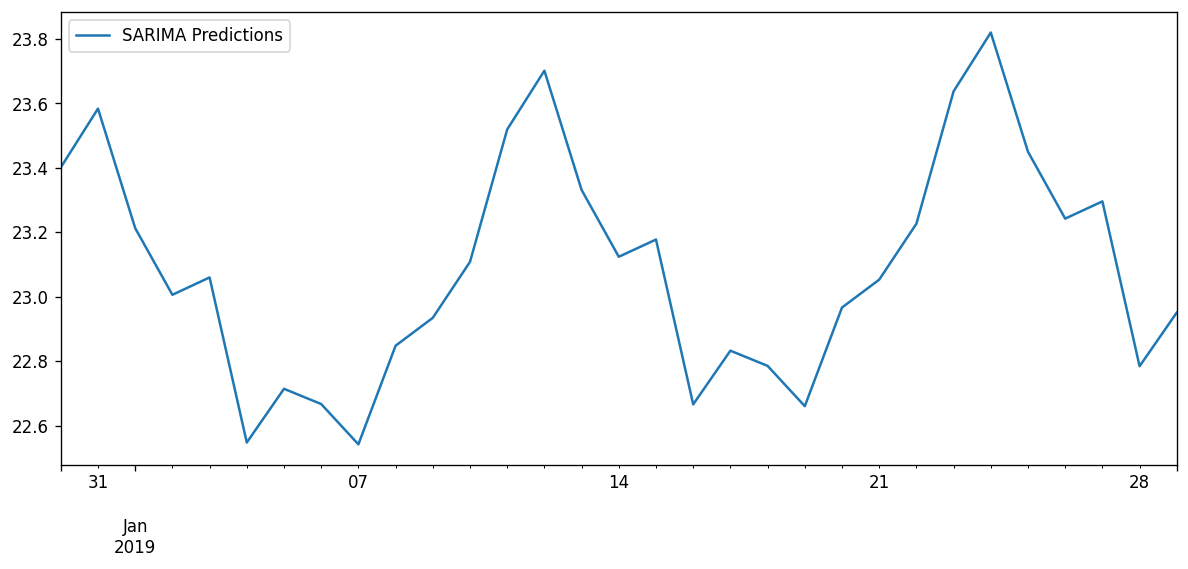

In [ ]:
pred.plot(figsize=(12,5),legend=True)



---



---





---



---

